In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers ,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()  #downloading the data set

170498071/170498071 [==============================] - 81s 0us/step


In [8]:
print(
    X_train.shape,
    X_test.shape
)

(50000, 32, 32, 3) (10000, 32, 32, 3)


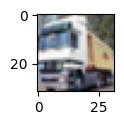

In [11]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[1])

In [13]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [16]:
y_train[:5]   #this is two dimensonal array , we have to convert in to the one dim array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']     #creating the classes 

In [20]:
classes[9]

'truck'

In [22]:
def plot_sample(X,y,index):
    plt.figure(figsize=(1,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

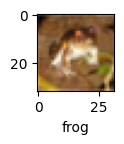

In [23]:
plot_sample(X_train,y_train,0)

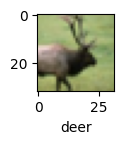

In [29]:
plot_sample(X_train,y_train,34)

In [31]:
#Normalized the values
X_train= X_train /255
X_test= X_test / 255 

In [32]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Building ANN first 

In [35]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.8122 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.6254 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5420 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4798 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4325 - accuracy: 0.4965


### observation : The ANN model low accuracy as there is very high computation , lets try CNN model


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(X_test)
y_pred_classses = [np.argmax(i) for i in y_pred]
print("classification report :",classification_report(y_test,y_pred_classses))

313/313 [==============================] - 4s 13ms/step
classification report :               precision    recall  f1-score   support

           0       0.62      0.45      0.52      1000
           1       0.62      0.61      0.61      1000
           2       0.37      0.33      0.35      1000
           3       0.38      0.20      0.26      1000
           4       0.49      0.30      0.37      1000
           5       0.43      0.35      0.39      1000
           6       0.35      0.82      0.49      1000
           7       0.62      0.46      0.53      1000
           8       0.52      0.72      0.60      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



Only 48% Accuracy By ANN

## Using CNN

In [40]:
np.argmax(y_pred[1])

9

In [41]:
cnn = models.Sequential([

        #CNN
        layers.Conv2D(filters=32, kernel_size=(3,3),activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D((2,2)),
        #danse
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        
        layers.Dense(10, activation='softmax')    
    ])



In [42]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [43]:

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5165 - accuracy: 0.4550
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1662 - accuracy: 0.5904
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0300 - accuracy: 0.6407
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9450 - accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8797 - accuracy: 0.6937
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8233 - accuracy: 0.7122
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7793 - accuracy: 0.7288
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7383 - accuracy: 0.7437
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7022 - accuracy: 0.7528
Epoch 10/10
1563/1563 [==============================] - 29s 18m

IN CNN we get arround 70% of accuracy 

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= cnn.predict(X_test)
y_pred_classses = [np.argmax(i) for i in y_pred]
print("classification report :",classification_report(y_test,y_pred_classses))

313/313 [==============================] - 2s 7ms/step
classification report :               precision    recall  f1-score   support

           0       0.71      0.74      0.73      1000
           1       0.78      0.84      0.81      1000
           2       0.57      0.56      0.57      1000
           3       0.48      0.56      0.52      1000
           4       0.60      0.65      0.63      1000
           5       0.69      0.46      0.55      1000
           6       0.69      0.82      0.75      1000
           7       0.80      0.67      0.73      1000
           8       0.78      0.80      0.79      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



Model checking

In [45]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [47]:
y_test= y_test.reshape(-1,)
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

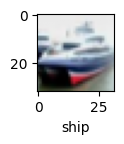

In [48]:
plot_sample(X_test,y_test,1)

In [51]:
classes[y_pred_classses[1]]

'ship'